In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

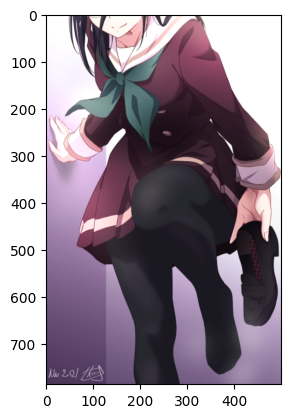

In [2]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# 图像矩

## 1.先要做边缘检测,获取二值图形

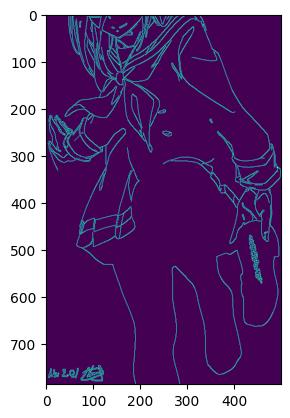

In [3]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(c)

## 2.计算轮廓

In [4]:
# 返回值为: 发现的轮廓对象, 图像的拓扑结构
contours, hierarchy = cv2.findContours(
    image=c,
    mode=cv2.RETR_TREE, # 方法
    method=cv2.CHAIN_APPROX_SIMPLE,
)

In [5]:
moments = []
for contour in contours:
    moment = cv2.moments(contour)
    moments.append(moment)
    # 使用 moment["m00"] 访问第 0 阶矩
    # 使用 moment["m10"] 访问第 1 阶矩
    # 使用 moment["m01"] 访问第 2 阶矩
    # ...

In [6]:
len(contours), len(css)

NameError: name 'css' is not defined

## 3.绘制轮廓

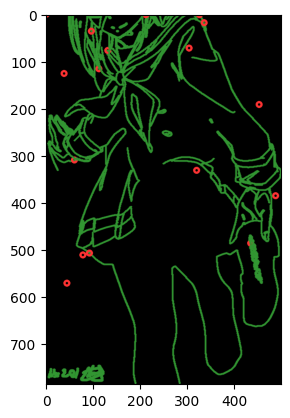

In [7]:
black = np.zeros(image.shape, dtype=np.uint8)
for i in range(len(contours)):
    cv2.drawContours(
        image=black,
        contours=contours,  # counters 发现的轮廓对象
        contourIdx=i,       # counter id,可以设置为 -1
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

    cv2.circle(
        img=black,
        center=[int(moments[i]["m10"]), int(moments[i]["m01"])],
        radius=5,
        color=(255, 51, 51),
        thickness=3,
    )

plt.imshow(black)